# **Aim : Create the Decision Tree classifier and visualize it graphically.**

Problem Statement : Prediction using Decision Tree Algorithm. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

Data Source : 
- historical stock prices from https://finance.yahoo.com/
- textual (news) data from https://bit.ly/36fFPI6

<h1 style="background-color:DodgerBlue;">Importing Necessary Libraries</h1>

In [5]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense , LSTM
import matplotlib.pyplot as plt
import math
import re
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor

Using TensorFlow backend.


<h1 style="background-color:MediumSeaGreen;">Working on Stock Data from Yahoo Finance.</h1>

In [16]:
stock_data = web.DataReader('^BSESN', data_source='yahoo', start='2020-04-19', end='2021-04-19')
stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-20,32056.470703,31490.259766,32056.189453,31648.000000,17200.0,31648.000000
2020-04-21,30900.119141,30378.259766,30836.189453,30636.710938,19700.0,30636.710938
2020-04-22,31471.140625,30578.550781,30856.140625,31379.550781,21000.0,31379.550781
2020-04-23,31959.019531,31292.919922,31646.449219,31863.080078,24400.0,31863.080078
2020-04-24,31842.240234,31278.269531,31426.619141,31327.220703,17600.0,31327.220703


In [17]:
stock_data.shape

(249, 6)

In [18]:
stock_data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,41843.355045,41215.454309,41588.110787,41539.871298,18863.052209,41539.871298
std,6505.013940,6459.314633,6510.437773,6491.183062,12839.474175,6491.183062
min,30739.960938,29968.449219,30159.589844,30028.980469,100.000000,30028.980469
25%,37125.980469,36512.921875,36880.660156,36737.691406,14100.000000,36737.691406
50%,40354.730469,39699.421875,39990.750000,39922.460938,17200.000000,39922.460938
75%,48627.429688,47864.140625,48464.910156,48347.589844,21000.000000,48347.589844
max,52516.761719,51886.460938,52400.031250,52154.128906,188300.000000,52154.128906


In [19]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-04-20 to 2021-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       249 non-null    float64
 1   Low        249 non-null    float64
 2   Open       249 non-null    float64
 3   Close      249 non-null    float64
 4   Volume     249 non-null    float64
 5   Adj Close  249 non-null    float64
dtypes: float64(6)
memory usage: 13.6 KB


In [23]:
stock_data["Date"]= pd.to_datetime(stock_data.index)
stock_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2020-04-20 to 2021-04-19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   High       249 non-null    float64       
 1   Low        249 non-null    float64       
 2   Open       249 non-null    float64       
 3   Close      249 non-null    float64       
 4   Volume     249 non-null    float64       
 5   Adj Close  249 non-null    float64       
 6   Date       249 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(6)
memory usage: 15.6 KB


In [26]:
stock_data = stock_data[["Date","Open","High","Low","Close","Volume"]]
stock_data.head()

,Date,Open,High,Low,Close,Volume
Date,,,,,,
2020-04-20,2020-04-20,32056.189453,32056.470703,31490.259766,31648.000000,17200.0
2020-04-21,2020-04-21,30836.189453,30900.119141,30378.259766,30636.710938,19700.0
2020-04-22,2020-04-22,30856.140625,31471.140625,30578.550781,31379.550781,21000.0
2020-04-23,2020-04-23,31646.449219,31959.019531,31292.919922,31863.080078,24400.0
2020-04-24,2020-04-24,31426.619141,31842.240234,31278.269531,31327.220703,17600.0


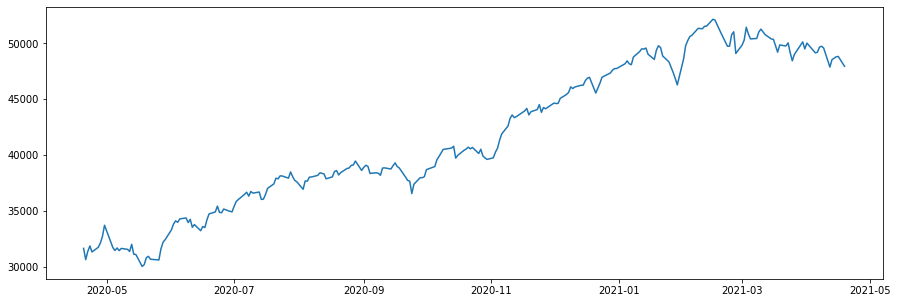

In [27]:
stock_data.dropna(inplace=True)


#plotting Close price for stock data

plt.figure(figsize=(15,5))
plt.plot(stock_data['Close'], label='Close Price history')

<h1 style="background-color:Chartreuse;">Reading textual news dataset </h1>

In [38]:
textual_data = pd.read_csv('india-news-headlines.csv')
textual_data.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [39]:
textual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 78.4+ MB


In [40]:
textual_data.describe()

,publish_date
count,3.424067e+06
mean,2.012659e+07
std,4.981132e+04
min,2.001010e+07
25%,2.009113e+07
50%,2.013092e+07
75%,2.017013e+07
max,2.020123e+07


In [41]:
#Checking for null values 

textual_data.isnull().sum()

publish_date         0
headline_category    0
headline_text        0
dtype: int64

In [42]:
textual_data.drop('headline_category', axis = 1, inplace=True)
print('Showing part of the whole dataset:')
textual_data.head(10)

Showing part of the whole dataset:


,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic
5,20010102,Dilute the power of transfers; says Riberio
6,20010102,Focus shifts to teaching of Hindi
7,20010102,IT will become compulsory in schools
8,20010102,Move to stop freedom fighters' pension flayed
9,20010102,Gilani claims he applied for passport 2 years ago


In [44]:
textual_data["publish_date"] = pd.to_datetime(textual_data["publish_date"],format='%Y%m%d')
textual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424067 entries, 0 to 3424066
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   publish_date   datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 52.2+ MB


In [46]:

textual_data.replace("[^a-zA-Z']"," ",regex=True,inplace=True)
textual_data["headline_text"].tail()

3424062    Covid     Despite dip in cases  Rajasthan amon...
3424063    Covid     Despite dip in cases  Rajasthan amon...
3424064    Covid     Despite dip in cases  Rajasthan amon...
3424065    Govt extends deadline for use of FASTag till F...
3424066    Celebs plan to party safely and responsibly on...
Name: headline_text, dtype: object

In [47]:
textual_data.head()

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic


In [49]:
textual_data['publish_date'] = pd.to_datetime(textual_data['publish_date'],format= '%Y %m %d')
textual_data

,publish_date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India
3,2001-01-02,For bigwigs it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


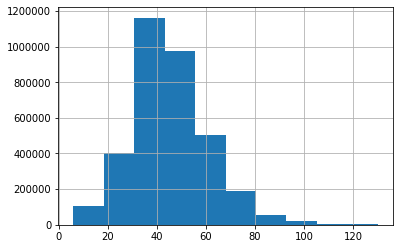

<Figure size 1440x576 with 0 Axes>

In [51]:
textual_data['headline_text'].str.len().hist()
plt.figure(figsize=(20,8))
plt.show()

In [57]:
from textblob import TextBlob

In [59]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [60]:
#Adding subjectivity score

textual_data['Subjectivity'] = textual_data['headline_text'].apply(getSubjectivity) 

In [61]:
textual_data['Polarity'] = textual_data['headline_text'].apply(getPolarity)


textual_data

,publish_date,headline_text,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000
2,2001-01-02,America's unwanted heading for India,0.000000,0.000000
3,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000
...,...,...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000


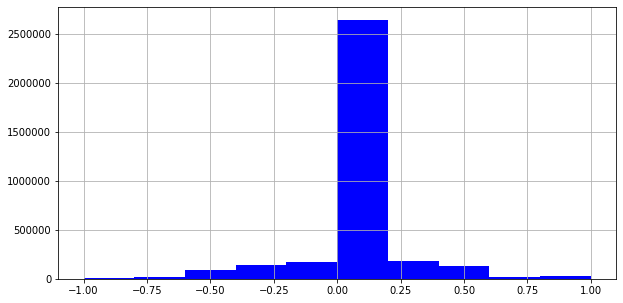

In [62]:
plt.figure(figsize = (10,5))
textual_data['Polarity'].hist(color = 'blue')

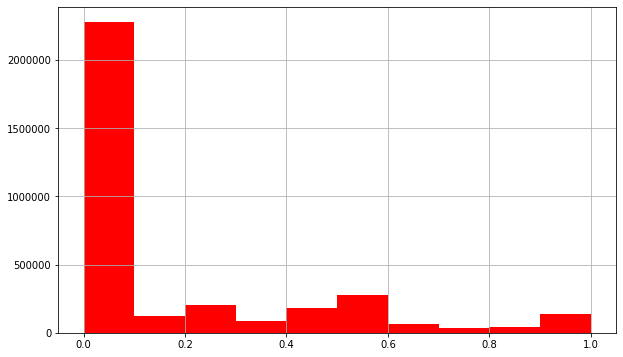

In [63]:
plt.figure(figsize = (10,6))
textual_data['Subjectivity'].hist(color = 'red')

<h1 style="background-color:Cadetblue;">Performing Sentiment Analysis </h1>

In [65]:
import nltk
nltk.download('vader_lexicon')

sa = SentimentIntensityAnalyzer()  ##Adding sentiment score to textual_data

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\500068735\AppData\Roaming\nltk_data...


In [67]:
textual_data['Negative'] = [sa.polarity_scores(v)['neg'] for v in textual_data['headline_text']] ##Adding sentiment score to news

In [68]:
textual_data['Neutral'] = [sa.polarity_scores(v)['neu'] for v in textual_data['headline_text']] ##Adding sentiment score to news

In [69]:
textual_data['Positive'] = [sa.polarity_scores(v)['pos'] for v in textual_data['headline_text']] ##Adding sentiment score to news

In [70]:
textual_data

,publish_date,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India,0.000000,0.000000,0.322,0.678,0.000
3,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.842,0.158


In [71]:
merge_df = textual_data
merge_df

,publish_date,headline_text,Subjectivity,Polarity,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya s...,0.000000,0.000000,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.000000,0.000000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India,0.000000,0.000000,0.322,0.678,0.000
3,2001-01-02,For bigwigs it is destination Goa,0.000000,0.000000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...,...,...
3424062,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424063,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424064,2020-12-31,Covid Despite dip in cases Rajasthan amon...,0.500000,0.500000,0.000,0.859,0.141
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000,0.000,0.842,0.158


In [72]:
clf = merge_df[['Subjectivity', 'Polarity',  'Negative', 'Neutral' ,'Positive']]  ##Dataset for the purpose of model training
clf

,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.000000,0.000000,0.000,0.805,0.195
1,0.000000,0.000000,0.000,1.000,0.000
2,0.000000,0.000000,0.322,0.678,0.000
3,0.000000,0.000000,0.000,1.000,0.000
4,0.241667,0.050000,0.000,0.658,0.342
...,...,...,...,...,...
3424062,0.500000,0.500000,0.000,0.859,0.141
3424063,0.500000,0.500000,0.000,0.859,0.141
3424064,0.500000,0.500000,0.000,0.859,0.141
3424065,0.000000,0.000000,0.000,0.842,0.158


In [73]:
scaler = MinMaxScaler()

In [74]:
df = pd.DataFrame(scaler.fit_transform(clf))

df.columns = clf.columns
df.index = clf.index

df.head() 

,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.000000,0.500,0.000,0.805,0.195
1,0.000000,0.500,0.000,1.000,0.000
2,0.000000,0.500,0.322,0.678,0.000
3,0.000000,0.500,0.000,1.000,0.000
4,0.241667,0.525,0.000,0.658,0.342


In [82]:
X=df[:1113]
X.shape

(1113, 5)

In [85]:
Y = df[:1113]
Y

,Subjectivity,Polarity,Negative,Neutral,Positive
0,0.000000,0.500000,0.000,0.805,0.195
1,0.000000,0.500000,0.000,1.000,0.000
2,0.000000,0.500000,0.322,0.678,0.000
3,0.000000,0.500000,0.000,1.000,0.000
4,0.241667,0.525000,0.000,0.658,0.342
...,...,...,...,...,...
1108,0.000000,0.500000,0.000,1.000,0.000
1109,0.571429,0.678571,0.000,0.270,0.730
1110,0.400000,0.600000,0.000,0.345,0.655
1111,0.400000,0.500000,0.000,1.000,0.000


In [86]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [87]:
model_rf = RandomForestRegressor()

In [88]:
model_rf.fit(x_train, y_train)
prediction=model_rf.predict(x_test)

In [90]:
print('Mean Squared error: ',mean_squared_error(prediction,y_test))

Mean Squared error:  0.0008551083277737797


<h1 style="background-color:Plum;">Decision Tree Regressor </h1>

In [92]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [93]:
pred = model.predict(x_test)


In [95]:
print('Mean Squared error: ',mean_squared_error(pred,y_test))

Mean Squared error:  0.0011455221027539973


- As the MSE for decision tree regressor is 0.001145, it serves as a suitable model for hybrid analysis